# PIT - Práctica 1: Análisis de Series Temporales - Modelos Clásicos

**Alicia Lozano Díez**
 
13 de febrero de 2023


## Objetivo

El objetivo de esta práctica es proporcionar una introducción al procesamiento y análisis de señales temporales: descomposición de una serie temporal para el estudio de sus propiedades, ajuste de modelos lineales (ARIMA) y predicción.

### Materiales - Moodle

- Guión (.ipynb) de la práctica
- Datos (.csv): bases de datos _AirPassengers.csv_ y _stocks_1yr.csv_.


# 1. Introducción al procesamiento de señales temporales: Air Passengers

## 1.1. Cargar los datos en Google Colab y manejo de los datos en Python

Primero vamos a descargar el fichero con los datos de la base de datos *AirPassengers.csv* de Moodle, que contiene los datos del número de pasajeros de una aerolínea para un periodo de tiempo.

Las siguientes líneas de código nos permitirán subir el archivo a Google Colab desde el disco local:

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


A continuación, vamos a leer el fichero *AirPassengers.csv* en Python, con la ayuda de la librería *pandas*.

Lo cargaremos haciendo uso también del módulo de Python *datetime* para operar con este tipo de datos de forma cómoda.

La función definida *parser* nos permitirá cambiar el formato de fecha/tiempo al formato que esperamos encontrar en nuestra base de datos.

In [3]:
from pandas import read_csv
from datetime import datetime
 
def parser(x):
	return datetime.strptime(x, '%Y-%m')
 
data = read_csv('AirPassengers.csv', header=0, parse_dates=[0], index_col=0, 
                squeeze=True, date_parser=parser)
print(data.head())

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64


Podemos visualizar cómo está indexada la estructura de datos, así como el número de datos que tiene nuestra serie temporal.

In [4]:
data.index


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Si queremos acceder a un dato en concreto, por ejemplo, el número de pasajeros del mes de marzo de 1949, podemos hacerlo de la siguiente forma:

In [5]:
data['1949-03-01']

132

O de esta otra:

In [6]:
data[datetime(1949,3,1)]

132

## 1.2. Representación de los datos


El primer paso para analizar una serie temporal es obtener una representación de los datos, para poder hacernos una idea de las características de la serie de forma visual. 

Para ello, podemos utilizar la librería *matplotlib* como sigue:

Text(0.5, 1.0, 'Serie temporal: Air Passengers')

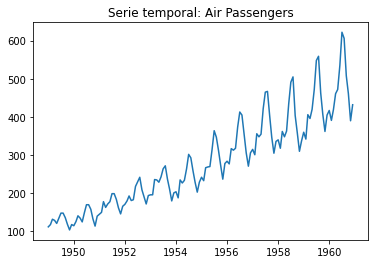

In [7]:
from matplotlib import pyplot as plt
plt.plot(data)
plt.title('Serie temporal: Air Passengers')

## 1.3. Estudio de la estacionariedad de la serie


Algunos de los modelos de análisis de series temporales asumen estacionariedad en las series. Por ello, vamos a ver dos métodos para comprobar si una serie es estacionaria.

Uno de ellos es un análisis más visual: calculamos la media y desviación estándar "móviles" (con una ventana deslizante). 

In [8]:
import pandas as pd

def test_stationarity_1(timeseries,window_size):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window_size).mean()
    rolstd = timeseries.rolling(window=window_size).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

El segundo método consiste en el test estadístico Dickey-Fuller:

In [9]:
import pandas as pd

from statsmodels.tsa.stattools import adfuller
def test_stationarity_2(timeseries):    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [10]:
def test_stationarity(timeseries,window_size):
  test_stationarity_1(timeseries,window_size)
  test_stationarity_2(timeseries)

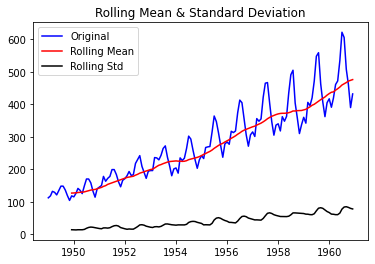

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(data,12)

**PREGUNTAS**

1.   ¿Qué conclusiones puede extraer del análisis de estacionariedad de la serie original?
2.   ¿Qué diferencias observas al variar el tamaño de la ventana para hacer las medias móviles? Prueba con un par de tamaños, incluye las gráficas obtenidas y explica las diferencias visuales que aprecias.

1.) Gráficamente podemos apreciar claramente que la serie no es estacionaria, debido a que la media y la desviación típica tienen una tendencia creciente. Por consiguiente, se mantienen constantes en el tiempo.

Y además vemos que a través del test de Dickey-Fuller, el valor obtenido del estadístico $t(≈0.81)$ da un p-valor aproximado de $0.99$. Por lo que podemos rechazar la hipótesis alternativa con un nivel de significación muy alto, lo que nos indicaría que es muy probable que el modelo tenga una raíz unitaria, haciendo a este modelo no estacionario.



2.)Lo primero que es conveniente resaltar es que la serie presenta a simple vista cierta estacionalidad, es decir, tenemos un comportamiento que se repite aproximadamente cada año. Además, sabiendo que los datos están tomados mes a mes, el tamaño de ventana coincidirá con el número de meses que estamos considerando para calcular la media y desviación típica. Realizamos las gráficas comentadas

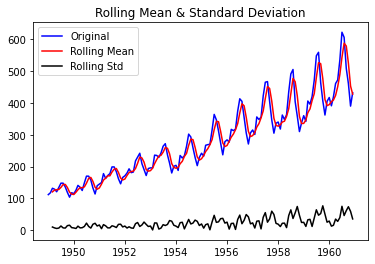

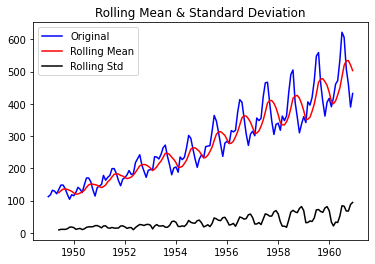

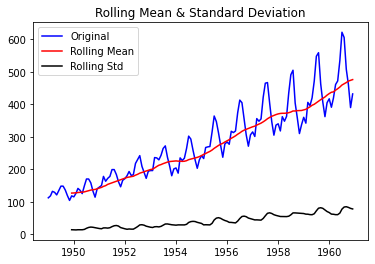

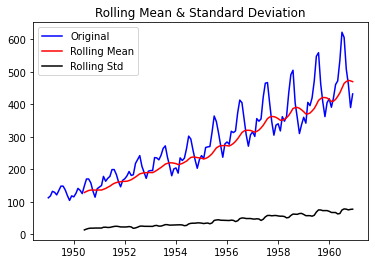

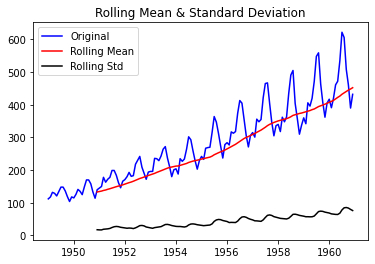

In [ ]:
n_meses = [3,6,12,18,24]
for meses in n_meses:
    test_stationarity_1(data,meses)

Se puede observar cómo cuando tomamos un número de meses (tamaño de ventana) menor, la media se aproxima mucho a la gráfica original y aumenta la varianza, mientras que al aumentar el tamaño hasta una ventana de dos años, se suavizan ambas componentes. Esto tiene sentido, pues al tomar un número de meses más grande estamos reduciendo la componente de estacionalidad que tiene la serie que hemos dicho que parece ser a simple vista de un período de 
un año. Esta se reduce pues estamos tomando valores cuando la estación ya se ha repetido más de una vez.

## 1.4. Transformar una serie temporal en estacionaria

Como hemos visto en la teoría, para analizar la serie y poder ajustarle un modelo tipo AR, MA o ARMA, esperamos que la serie a modelar sea estacionaria. 

Para conseguir una serie lo más estacionaria posible, podemos aplicar distintas transformaciones de la serie original. Vamos a ver algunos ejemplos:

a) *Transformaciones simples para reducir el efecto de la tendendia*:

En el caso de los datos del ejemplo, la tendencia es positiva, por lo que podemos aplicar alguna transformación que penalice los valores más altos y menos los más bajos. Es el caso del logaritmo, la raíz cuadrada, etc. 

**PREGUNTA**


1.   Representa a continuación la serie aplicándole una transformación logarítmica. ¿Qué observas?



Se observa que se ha suavizado mucho el crecimiento que tenía la serie, y ahora la tendencia de la media es mucho menor que en el caso anterior. Hemos conseguido por tanto lo que se pretendía que era penalizar los valores más altos, haciéndolos más cercanos a los valores más pequeños para frenar esa tendencia creciente y aumentando así la estacionaridad: vemos que la desviación típica ya es casi constante y la media tiene un crecimiento muy lento.

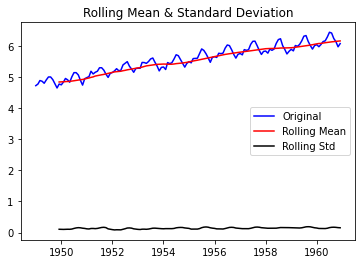

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [12]:
import numpy as np
log_data = data.apply(np.log)
test_stationarity(log_data,window_size = 12)

En casos más complejos en los que la tendencia no se ve clara (sobre todo en presencia de ruido), se pueden aplicar otros métodos. Uno de ellos es el suavizado como las medias móviles (*moving average*). 

Por ejemplo, podemos aplicar un suavizado con una media con ventana deslizante que tenga en cuenta un año (12 meses). 
Ten en cuenta, que esto implicará que para calcular la media de las primeras muestras, no tengo suficientes datos para la ventana. Esto lo podemos ver en la salida de la media móvil (tendremos que eliminar los *NaN* que aparecen).


**PREGUNTAS**


1.   Aplica dicha media móvil y represéntala junto a los datos. Puede utilizar los datos en escala logarítmica. ¿Esta media móvil representa claramente la tendencia de la serie?

2.   Elimina ahora de la serie original (transformada con el logaritmo si es como la has calculado previamente) la influencia de esta media móvil y representa el resultado. ¿Qué observas ahora?

3.   Realiza el test de estacionariedad de la serie resultante y compáralo con el de la serie original. ¿Qué conclusiones puedes obtener tanto del test visual como del test estadístico?






1.)Vamos a aplicar el suavizado mediante media móvil en ambos casos, viendo cuál es el resultado para cada uno de los casos.

Original data


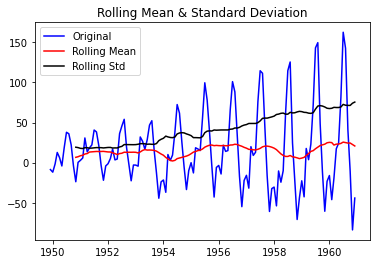



 Logarithm data


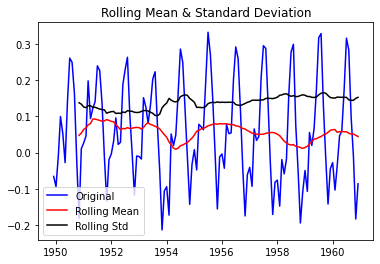

In [16]:
data_sub_mean = (data-data.rolling(window = 12).mean().dropna()).dropna()
log_data_sub_mean= (log_data-log_data.rolling(window = 12).mean().dropna()).dropna()
print("Original data")
test_stationarity_1(data_sub_mean, window_size = 12)
print("\n\n Logarithm data")
test_stationarity_1(log_data_sub_mean, window_size = 12)

Se observa cómo al aplicar este suavizado por media móvil, las medias de las series en ambos casos (tanto la original como a la que le hemos aplicado el logaritmo) mantienen una media que es prácticamente constante, por lo que podemos decir que la media móvil sí representa la tendencia de nuestra serie suavizada.

2.) Vamos ahora a eliminar el efecto de la media móvil. Para ello, volvemos a sumar en ambas series la media en ventanas de tamaño $12$.

Dis-apply on Original data


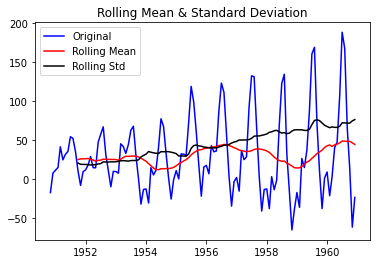



 Dis-apply on Logarithm data


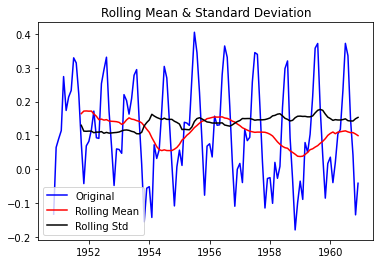

In [15]:
data_dis_apply = (data_sub_mean + data_sub_mean.rolling(window = 12).mean().dropna()).dropna()
log_data_dis_apply = (log_data_sub_mean + log_data_sub_mean.rolling(window = 12).mean().dropna()).dropna()

print("Dis-apply on Original data")
test_stationarity_1(data_dis_apply, window_size = 12)
print("\n\n Dis-apply on Logarithm data")
test_stationarity_1(log_data_dis_apply, window_size = 12)

El efecto obtenido en ambos casos tiene bastante sentido: al aplicar el suavizado por media móvil, hemos convertido las series en series de media cero, por lo que al sumarle la media en intervalos no estaremos sumando prácticamente nada en ambos casos. Vemos que se mantienen bastante similares al caso anterior en su forma, aunque el valor de la media ha aumentado en el caso de la serie original, que veíamos que tenía una desviación típica creciente.

3.) Por último, vamos a realizar ambos tests sobre las series del apartado anterior

Test on Original data


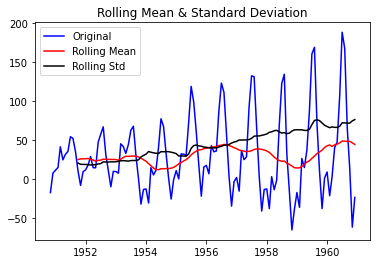

Results of Dickey-Fuller Test:
Test Statistic                  -3.249015
p-value                          0.017317
#Lags Used                      13.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


 Test on Logarithm data


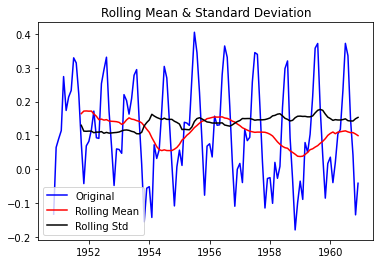

Results of Dickey-Fuller Test:
Test Statistic                  -3.231625
p-value                          0.018226
#Lags Used                      13.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


In [17]:
print("Test on Original data")
test_stationarity(data_dis_apply, 12)
print("\n\n Test on Logarithm data")
test_stationarity(log_data_dis_apply,12)

Vemos que ahora, en ambos casos, hemos conseguido que el valor del estadístico sea bastante cercano al que tenemos en el valor crítico del 1%, y que el p-valor sea inferior al nivel de significancia estándar $\alpha= 0.05$. Es por ello que en este caso rechazamos la hipótesis nula y podemos decir que el modelo sí es estacionario.

b) *Diferenciar (derivar)*:

Las técnicas anteriores son sencillas y pueden eliminar parte de la influencia de la tendencia de la serie, pero no suelen ser suficientes cuando se tiene por ejemplo estacionalidad. 

Diferenciar (o derivar) es uno de los métodos más comunes para eliminar la influencia de la tendencia y la estacionalidad en la serie original, mejorando las propiedades de estacionariedad de la serie. 

Podemos tomar la derivada de orden uno de la siguiente manera (partimos de la serie en el dominio logarítmico): 

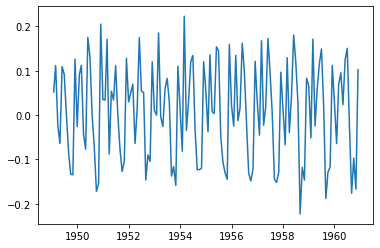

In [19]:
data_log_diff = (log_data - log_data.shift()).dropna()
plt.plot(data_log_diff)

**PREGUNTAS**


1.   ¿Qué observas en la serie resultante?
2.   ¿Es esta serie estacionaria de acuerdo a los criterios anteriores? Incluye los resultados gráficos y del test estadístico e interprétalos.
3. Repite el proceso para una segunda derivada. ¿Qué observas ahora?



1.)La serie resultante parece, a priori, una serie estacionaria. Vemos que su media debe ser aproximadamente cero y sus valores no exceden en casi ningún momento el $|0.2|$, por lo que su desviación típica también debe serlo. 

2.)Para comprobar su estacionariedad realizamos los dos test anteriores

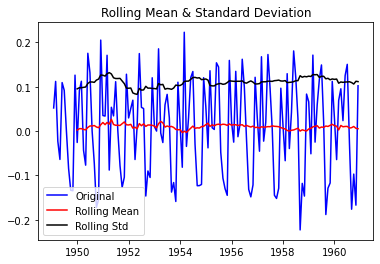

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [ ]:
test_stationarity(data_log_diff,12)

A nivel visual, podemos decir que la serie parece estacionaria, pues tenemos sus parámetros media y desviación típica prácticamente constantes.

Sin embargo, el test Dickey-Fuller nos indica que, con un nivel de significancia $\alpha= 0.05$, no podemos descartar la hipótesis nula de que nuestra serie temporal no tenga una raíz no unitaria, por lo que a este nivel de significancia el modelo no es estacionario, tendríamos que elevarnos a un nivel de significancia del 10% para que nuestro valor del estadístico quedara por encima del valor crítico calculado.

3.) Repetimos el proceso para hallar probar con la segunda derivada

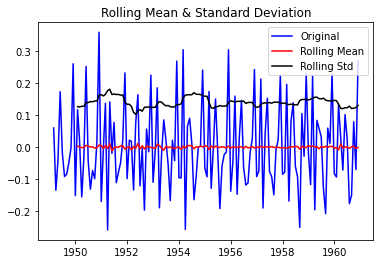

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


In [20]:
data_log_second_diff = (data_log_diff - data_log_diff.shift()).dropna()
test_stationarity(data_log_second_diff, 12)

Aquí podemos observar que usando el test Dickey-Fuller, vemos ahora que tenemos un p-valor extremadamente bajo, por lo que en este caso podemos decir con toda seguridad que rechazamos la hipótesis nula, y que por tanto nuestro modelo tras aplicar dos diferencias es estacionario.

c) *Descomposición de la serie*:

La mayoría de series pueden descomponerse en tendencia, estacionalidad y residuo, como hemos visto en clase. 

Utilizando la función *seasonal_decompose* del módulo de Python *statsmodels* podemos obtener estas tres componentes y por tanto, modelarlas por separado: 

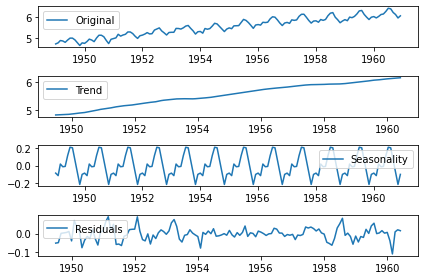

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(log_data)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(log_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**PREGUNTAS**

1.   ¿Es la señal residual estacionaria? Realiza el test y comenta los resultados.



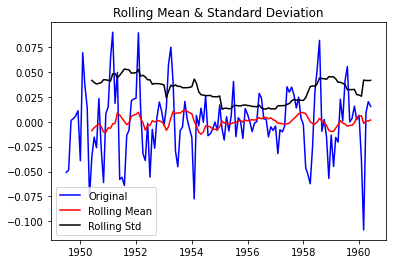

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [22]:
test_stationarity((residual).dropna(), 12)

1.) Tanto gráficamente como por el p-valor la señal residual es estacionaria

## 1.5. Modelado ARIMA y predicción

Uno de los modelos clásicos para series temporales vistos en clase es el modelo ARIMA, que permite derivar *d* veces, y aplicar *p* coeficientes autorregresivos (AR) y *q* términos de error (shocks, provenientes de la parte MA) en la combinación lineal.  

Para determinar el valor de los parámetros *p* y *q*, podemos hacer uso de las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF). 

Si calculamos dichas funciones para la serie derivada previamente, obtenemos lo siguiente:

Text(0.5, 1.0, 'Partial Autocorrelation Function')

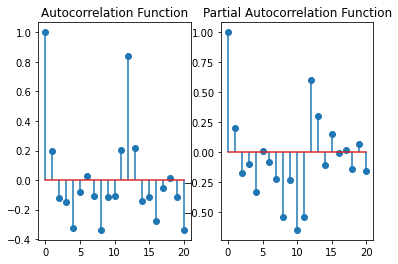

In [23]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data_log_diff, nlags=20, fft=False)
lag_pacf = pacf(data_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.stem(lag_acf,use_line_collection=True)
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.stem(lag_pacf,use_line_collection=True)
plt.title('Partial Autocorrelation Function')

Podemos añadir además un intervalo de confianza a ambos lados del valor cero, de tal manera que el primer valor de retardo que cruce ese intervalo por arriba en la función de PACF será el valor de *p*, y de ACF, será *q*.

Para los niveles de confianza estándar, el valor del límite del intervalo de confianza al 95% es 1.96. Suponiendo desviación estándar unidad, el límite estaría en (-1.96/sqrt(N), 1.96/sqrt(N)), donde N es el número de puntos. 

Si incluimos estos límites en la figura anterior, podemos obtener una buena aproximación de los valores de *p* y *q* para el modelo ARIMA:

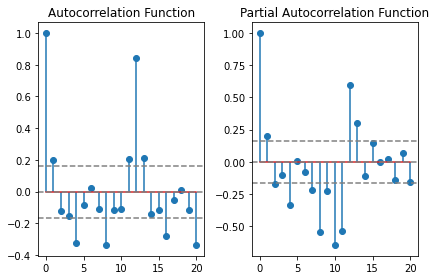

In [24]:
#Plot ACF: 
plt.subplot(121) 
plt.stem(lag_acf,use_line_collection=True)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.stem(lag_pacf,use_line_collection=True)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

**PREGUNTAS**


1.   ¿Qué valores de *p* y *q* utilizarías para un primer modelo ARIMA de acuerdo a las representaciones anteriores?



$\textbf{Respuesta:}$

Se tiene que tanto el $p$ tal que el valor de la PACF es mayor que el valor límite del intervalo establecido para la PACF tiene desplazamiento $p$, como
el $q$ tal que el valor de la ACF es mayor que el valor límite del intervalo establecido para la ACF tiene desplazamiento $q$.

En este caso, vemos que para desplazamiento 1, ambos casos superan ese umbral, por lo que podemos tomar $p=q=1$. Podríamos considerar valores en los que la función de autocorrelación es mayor, pero esto supondría ajustar un número mayor de parámetros y hacer el modelo más complejo, por lo que nos quedaremos con el modelo simple.

Una vez elegidos los valores de *p* y *q*, podemos utilizar también la derivación interna de la clase ARIMA (*d*) o aplicarlo sobre la serie previamente derivada con valor de *d=0*. 

A continuación, importamos el modelo ARIMA de la siguiente manera. 

Este modelo tiene como argumentos los datos, y el orden: 

model = ARIMA(datos, order = (p,d,q))

In [25]:
from statsmodels.tsa.arima_model import ARIMA


**PREGUNTAS**


1.   A continuación, completa los valores de p, d y q y utiliza el siguiente código para ajustar un modelo tipo AR. Incluye el resultado en el informe de la práctica así como los valores elegidos. ¿Qué error de ajuste (RSS) se obtiene?

2.    Repite el código con los valores de los parámetros correspondientes para ajustar un modelo MA. Incluye el resultado en el informe de la práctica así como los valores elegidos. ¿Qué error de ajuste (RSS) se obtiene?

3.    Repite nuevamente el código para combinar los modelos anteriores (ARMA). Incluye el resultado en el informe de la práctica así como los valores elegidos. ¿Qué error de ajuste (RSS) se obtiene?

4.   De acuerdo a los valores de RSS, ¿cuál dirías que es el modelo que mejor se ajusta a los datos?

1.) A partir de este punto suponemos que la serie sobre la que queremos ajustar los modelos es la serie a la que le hemos aplicado el logaritmo y una diferencia, así que normalmente escribiremos d=0 pues la diferencia ya está aplicada. Hemos visto que era conveniente usar $p=1$, por lo que ajustaremos este modelo.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

Text(0.5, 1.0, 'RSS: 1.5476')

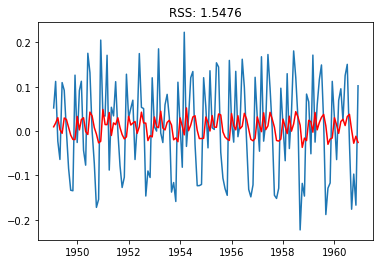

In [34]:
from statsmodels.tsa.arima_model import ARIMA
p = 1
d = 0
q = 0
# AR
model = ARIMA(data_log_diff, order=(p, d, q))  
results_AR = model.fit(disp=-1)
plt.plot(data_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data_log_diff)**2)) 
# RSS: Residual sum of squares

En principio, parece que este modelo AR no ajusta muy bien a los datos, las predicciones se alejan de los valores reales y son prácticamente constantes, teniendo un error de $1.54$ lo cual parece bastante grande considerando la baja escala de los datos.

2.)Ajustamos un modelo MA ahora. Del mismo modo que antes, basta elegir $p=d=0$ y $q=1$ para ajustar este modelo utilizando las funciones que tenemos. Lo ejecutamos para hallar el error:

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 1.5245')

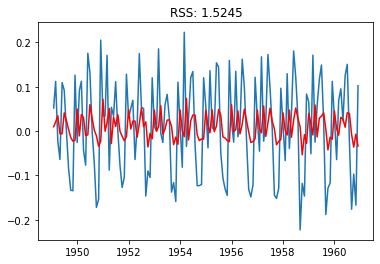

In [36]:
from statsmodels.tsa.arima_model import ARIMA
p = 0
d = 0
q = 1
# MA
model = ARIMA(data_log_diff, order=(p, d, q))  
results_AR = model.fit(disp=-1)
plt.plot(data_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data_log_diff)**2)) 
# RSS: Residual sum of squares

Como vemos, este modelo tampoco ajusta bien a los datos que estamos considerando. En concreto, tenemos un error de $1.52$ y las predicciones parecen también mucho más constantes que los datos.

3.) Vamos a combinar ahora los dos modelos anteriores para aplicar un modelo ARMA sobre la serie diferenciada (por lo que estaríamos haciendo ARIMA). Para ello, tenemos que considerar $p=q=1$ y realizar las mismas acciones que anteriormente.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 1.4597')

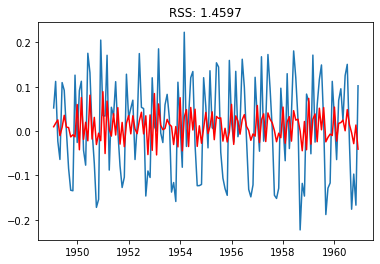

In [37]:
from statsmodels.tsa.arima_model import ARIMA
p = 1
d = 0
q = 1
# ARMA
model = ARIMA(data_log_diff, order=(p, d, q))  
results_AR = model.fit(disp=-1)
plt.plot(data_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data_log_diff)**2)) 
# RSS: Residual sum of squares

3.) Vemos que en este caso obtenemos unas predicciones ciertamente algo mejores, aunque siguen estando lejos de los datos diferenciados originales. El error en este caso baja unas centésimas, situándose en $1.46$.

4.) Siguiendo los resultados de RSS obtenidos, vemos que el modelo ARMA (ARIMA, si consideramos que estamos usando la serie derivada previamente), es el modelo que menor RSS obtiene por lo que sería el modelo que mejor ajusta nuestros datos.

Por último, para predecir valores en el espacio original, tenemos que deshacer las transformaciones realizadas hasta el momento. 

Primero, tomamos los valores ajustados por el modelo (predicciones) y los guardamos como serie temporal. 

Estos valores empiezan en el segundo mes, puesto que hemos tomado diferencias (derivada) de orden 1.

In [38]:
# Predicciones en el espacio original
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())


Month
1949-02-01    0.009800
1949-03-01    0.017618
1949-04-01    0.025229
1949-05-01   -0.010225
1949-06-01    0.008528
dtype: float64


Segundo, deshacemos la operación de diferencias (en escala logarítmica), con una suma acumulativa y añadiéndoles el valor "base" (primer elemento de la serie). 

In [39]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009800
1949-03-01    0.027418
1949-04-01    0.052648
1949-05-01    0.042422
1949-06-01    0.050950
dtype: float64


In [40]:
predictions_ARIMA_log = pd.Series(log_data[0], index=log_data.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
print(predictions_ARIMA_log.head())

Month
1949-01-01    4.718499
1949-02-01    4.728299
1949-03-01    4.745917
1949-04-01    4.771146
1949-05-01    4.760921
dtype: float64


Finalmente, aplicamos la función exponencial (inversa del logaritmo).

Podemos calcular el error cuadrático medio en el espacio original. 

Text(0.5, 1.0, 'RMSE: 52.4891')

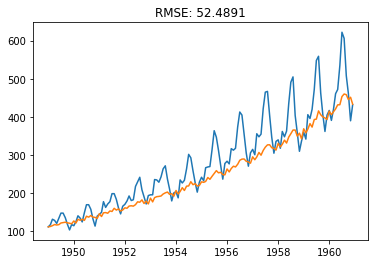

In [41]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data)**2)/len(data)))

# 2. Aplicación a otros datos: Acciones en bolsa S&P 500 stock data


Vamos a cargar ahora los datos sobre las acciones en bolsa del fichero *stocks_1yr.csv*:

In [18]:
from google.colab import files
uploaded = files.upload()

Saving stocks_1yr.csv to stocks_1yr.csv


Esta base de datos contiene los datos para las acciones (*stocks*) de un año, y por columnas, contiene los siguientes campos: 


* Date - en formato: yy-mm-dd

* Open - precio de la acción en la apertura de la bolsa

* High - precio más alto alcanzado en el día

* Low Close - precio más bajo en el día

* Volume - Número de acciones vendidas/compradas

* Name - Nombre de la compañía

In [42]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')
 
data = read_csv('stocks_1yr.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(data.head())

             open   high    low  close    volume Name
date                                                 
2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


<ipython-input-42-a2b4ced545d9>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


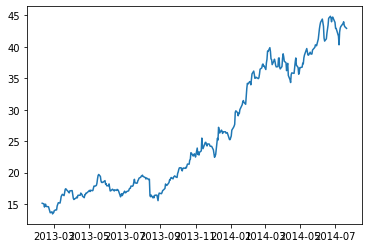

In [43]:
from matplotlib import pyplot as plt
plt.plot(data.high)

**PREGUNTAS**

Utilizando las herramientas del apartado 1, realiza el análisis de esta serie (puedes utilizar un intervalo de ella o la serie completa). 

En concreto:
1.   Analiza la estacionariedad de esta serie. 
2.   ¿Qué transformaciones puedes realizar para hacerla más estacionaria? Prueba algunas y justifica si consigues una serie más estacionaria. 
3.   Ajusta un modelo ARIMA, y calcula el error de predicción. 



1.) Procedemos a analizar individualmente la serie de datos "data.high". Para ello empezamos estudiando su estacionariedad mediante la función de la primera parte.

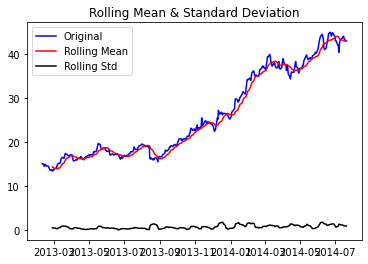

Results of Dickey-Fuller Test:
Test Statistic                   0.239126
p-value                          0.974373
#Lags Used                       3.000000
Number of Observations Used    360.000000
Critical Value (1%)             -3.448646
Critical Value (5%)             -2.869602
Critical Value (10%)            -2.571065
dtype: float64


In [58]:
datah=data.high
test_stationarity(datah,12)

Podemos observar de nuevo que tanto gráficamente, como por el p-valor en el test de Dickey-Fuller es muy probable que la serie de datos original no sea estacionaria.

2) Descomponemos la serie en la tendencia, la estacionalidad y el residuo para ver que transformaciones nos interesa realizar a nuestros datos originales para luego aplicar ARIMA.

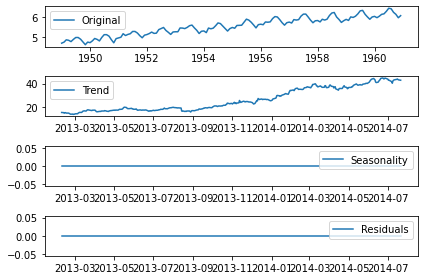

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(datah, period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(log_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Podemos obervar como tanto la estacionalidad como el residuo no afectan a la serie original. Luego puede en este caso sea conveniente aplicar una transformación logarítmica y un método de suavizado comov el de la medias móviles.

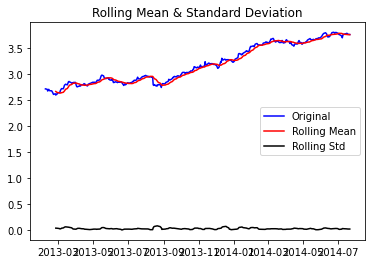

Results of Dickey-Fuller Test:
Test Statistic                  -0.320296
p-value                          0.922580
#Lags Used                       1.000000
Number of Observations Used    362.000000
Critical Value (1%)             -3.448544
Critical Value (5%)             -2.869557
Critical Value (10%)            -2.571041
dtype: float64


In [65]:
import numpy as np
log_datah = datah.apply(np.log)
test_stationarity(log_datah,window_size = 12)

Con la primera transformación hemos logrado que disminuya el crecimiento que tenía la serie, y ahora la tendencia de la media es mucho menor que en el caso anterior. Sin embargo, sigue sin ser suficiente. Es por ello que seguimos con el segundo paso pensado.

In [68]:
log_datah_sub_mean = (log_datah-log_datah.rolling(window = 12).mean().dropna()).dropna()



 Test on Logarithm data


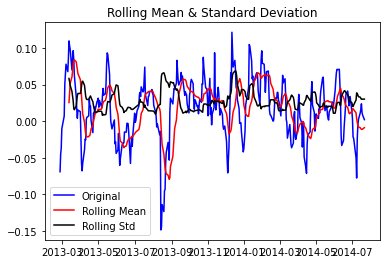

Results of Dickey-Fuller Test:
Test Statistic                -5.703557e+00
p-value                        7.578519e-07
#Lags Used                     2.000000e+00
Number of Observations Used    3.500000e+02
Critical Value (1%)           -3.449173e+00
Critical Value (5%)           -2.869833e+00
Critical Value (10%)          -2.571188e+00
dtype: float64


In [69]:
print("\n\n Test on Logarithm data")
test_stationarity(log_datah_sub_mean,12)

Ahora si podemos apreciar una disposición de los datos correcta, debido a que de esta forma pasan de forma olgada ambos test. 

3.) Debido al posible exceso de complejidad del modelo, vamos a ahorrarnos la transformación de los datos mediante la derivada. Aunque si vamos a tratar de obtener el mejor ajuste para $p$ y $q$ de un modelo ARMA.

Es por ello que empezamos obteniendo las siguientes figuras para hallar esos parámetros:

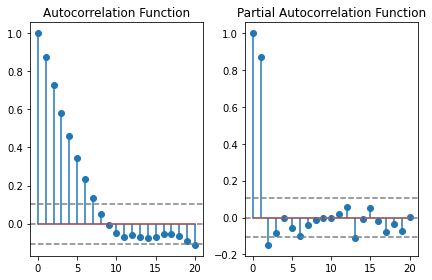

In [70]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(log_datah_sub_mean, nlags=20, fft=False)
lag_pacf = pacf(log_datah_sub_mean, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.stem(lag_acf,use_line_collection=True)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_datah_sub_mean)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_datah_sub_mean)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.stem(lag_pacf,use_line_collection=True)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_datah_sub_mean)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_datah_sub_mean)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Vemos que para $p$ el primer valor que está por debajo del umbral es $4$ y para $q$ es 9. Pero para que el modelo tenga una solución no tan compleja $p≈q$, y en este caso lo mejor seria coger valores que estén debajo del umbral. Luego con $q=9$, $p=10$ obtenemos una construcción bastante optima del modelo.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'RSS: 0.1405')

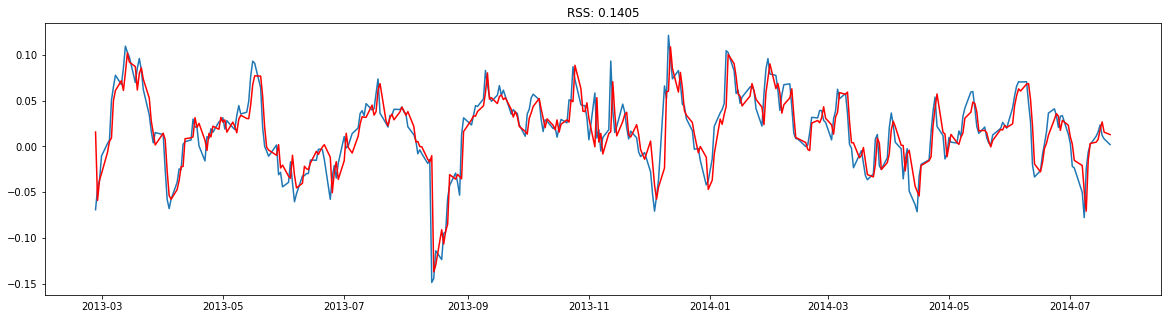

In [72]:
from statsmodels.tsa.arima_model import ARIMA
p = 10
d = 0
q = 9
# AR
model = ARIMA(log_datah_sub_mean, order=(p, d, q))  
results_AR = model.fit(disp=-1)
plt.figure(figsize=(20,5))
plt.plot(log_datah_sub_mean)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-log_datah_sub_mean)**2)) 
# RSS: Residual sum of squares

Por último nos aplicar la transformaciones necesarias que deshagan todo lo hecho anteriormente para comparar los datos de nuestro modelo con la serie original.

In [73]:
log_datah_rolling=log_datah.rolling(window = 12).mean().dropna()

Text(0.5, 1.0, 'RMSE: 0.5101')

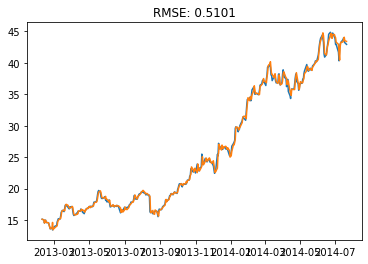

In [74]:
predictions_ARIMA_log_sub_mean=pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_log_sub_mean=(predictions_ARIMA_log_sub_mean + log_datah_rolling)
predictions_ARIMA_log = pd.Series(log_datah[0:11], index=log_datah.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_log_sub_mean,fill_value=0)


predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(datah)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-datah)**2)/len(datah)))